# CatBoost Algorithm

CatBoost is a state-of-the-art open-source gradient boosting on decision trees library. It's simple and easy to use. And is now regularly one of the top algorithms used in data science competitions as it produces very good results without extensive data clean-up or feature engineering.

In [55]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [87]:
# load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Pre-Processing

### 1.1 Handling Missing Values using imputer
- **`KNN`** Imputer is used to impute numeric values.
- **`Simple`** Imputer is used to impute categorical values.

### Handling Missing Values using pandas
* **`Mean`**: Best for numerical, normally distributed data with no outliers.
* **`Median`**: Best for numerical data that is skewed or has outliers.
* **`Mode`**: Best for categorical data to fill missing values with the most common category.

In [88]:
df.shape

(891, 15)

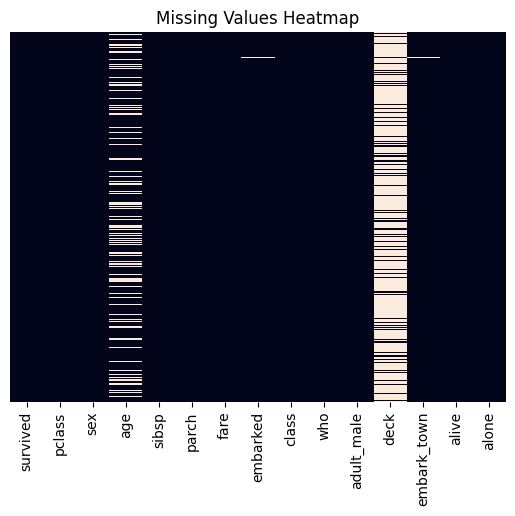

In [89]:
sns.heatmap(
    df.isnull(), 
    cbar=False, 
    yticklabels=False,
    )
plt.title("Missing Values Heatmap")
plt.show()

In [90]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

#### As deck column have 688 missing values we will remove it.

In [91]:
df.drop('deck', axis=1, inplace=True)

In [92]:
df.isnull().sum().sort_values(ascending=False)

age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [93]:
# impute missing values in age using knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['age'] = imputer.fit_transform(df[['age']])
# df['age'] = imputer.fit_transform(df[['age']])

# # impute missing values in embarked and embark town using simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['embarked', 'embark_town']] = imputer.fit_transform(df[['embarked', 'embark_town']])

# impute missing values in age and fare using pandas
# df['age'] = df['age'].fillna(df['age'].median())
# df['fare'] = df['fare'].fillna(df['fare'].median())
# df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])


In [94]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

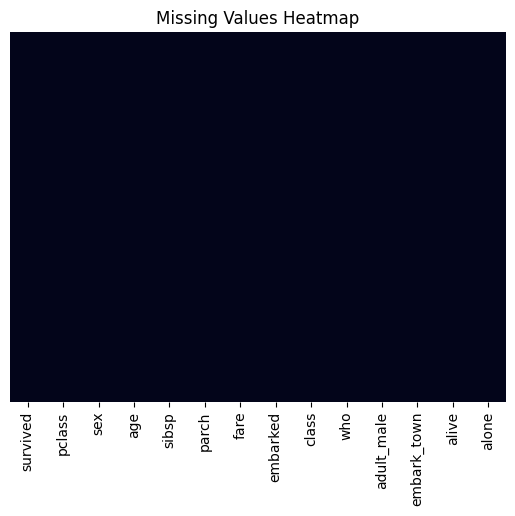

In [95]:
sns.heatmap(
    df.isnull(), 
    cbar=False, 
    yticklabels=False,
    )
plt.title("Missing Values Heatmap")
plt.show()

### 1.2 Data Summary

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [97]:
def count_column_types(df):
    categorical_count = len(df.select_dtypes(include=['category']).columns)
    object_count = len(df.select_dtypes(include=['object']).columns)
    float_count = len(df.select_dtypes(include=['float64']).columns)
    integer_count = len(df.select_dtypes(include=['int64']).columns)
    bool_count = len(df.select_dtypes(include=['bool']).columns)
    
    print(f'Categorical Columns: {categorical_count}')
    print(f'Object Columns: {object_count}')
    print(f'Float Columns: {float_count}')
    print(f'Integer Columns: {integer_count}')
    print(f'bool Columns: {bool_count}')

count_column_types(df)

Categorical Columns: 1
Object Columns: 5
Float Columns: 2
Integer Columns: 4
bool Columns: 2


In [98]:
def count_column_types(df):
    print("Categorical Columns: " , len(df.select_dtypes(include=['category']).columns))
    print("Object Columns: " , len(df.select_dtypes(include=['object']).columns))
    print("Float Columns: " , len(df.select_dtypes(include=['float64']).columns))
    print("Integer Columns: " , len(df.select_dtypes(include=['int64']).columns))
    print("bool Columns: " , len(df.select_dtypes(include=['bool']).columns))

count_column_types(df)

Categorical Columns:  1
Object Columns:  5
Float Columns:  2
Integer Columns:  4
bool Columns:  2


#### Converting each object columns to categorical

In [101]:
# convert each categorical columns to categorical data type
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# for col in categorical_cols:
#     df[col] = df[col].astype('category')

# now adding categorical columns into dataframe
df[categorical_cols] = df[categorical_cols].astype('category')

In [103]:
count_column_types(df)

Categorical Columns:  6
Object Columns:  0
Float Columns:  2
Integer Columns:  4
bool Columns:  2


#### Splitting Data

In [104]:
# split data into X and y
X = df.drop('survived', axis=1)
y = df['survived']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# run the catboost classifier
model = CatBoostClassifier(
    iterations=100, # number of iterations
    learning_rate=0.1, # learning rate
    depth=3, # depth of the tree
    loss_function='Logloss', # loss function
    eval_metric='Accuracy', # evaluation metric
    random_seed=42, # random seed
    verbose=False, # verbosity
    )


# train the model
model.fit(
    X_train, y_train, 
    cat_features=categorical_cols.tolist(), # we are telling the model which columns are categorical
    # catboost model require cat_features and should be a list
    )
# predictions
y_pred = model.predict(X_test)
# evaluate the model
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}')
print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

Accuracy Score: 1.0
Confusion Matrix: 
 [[105   0]
 [  0  74]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

